In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import webbrowser

# About Scale-Up Visa 

In [2]:
Scale_up_requirements = webbrowser.open("https://www.gov.uk/scale-up-worker-visa",new = 2)

In [3]:
df=pd.read_csv("2022-09-01_-_Worker_and_Temporary_Worker.csv")

In [4]:
df.drop_duplicates()
df["Town/City"].replace({"LONDON":"London"},inplace = True)
df1 = df.groupby("Town/City")["Route"].value_counts().to_frame(name = "Count").sort_values(by="Count",ascending = False).reset_index()
df2=df.groupby("Town/City")[["Organisation Name"]].nunique().sort_values(by = "Organisation Name",ascending = False).reset_index().head().rename(columns = {"Organisation Name" :"Number of Firms"})
df["City_London"] = df["Town/City"].apply(lambda x : "Others" if x != "London" else x)

In [5]:
df.head()

,Organisation Name,Town/City,County,Type & Rating,Route,City_London
0,(Arbuthnott Community Association) Lewis Grass...,Laurencekirk,Aberdeenshire,Worker (A rating),Skilled Worker,Others
1,(Arbuthnott Community Association) Lewis Grass...,Laurencekirk,Aberdeenshire,Temporary Worker (A rating),Charity Worker,Others
2,@ Architect UK Ltd,West Horndon,Essex,Worker (A rating),Skilled Worker,Others
3,@ Home Accommodation Services Ltd,London,NaN,Worker (A rating),Skilled Worker,London
4,@ Home Accommodation Services Ltd,London,NaN,Temporary Worker (A rating),Creative Worker,London


In [6]:
df1.head()

,Town/City,Route,Count
0,London,Skilled Worker,16300
1,London,Global Business Mobility: Senior or Specialist...,4791
2,London,Creative Worker,634
3,Manchester,Skilled Worker,627
4,Birmingham,Skilled Worker,624


In [7]:
df2.head()

,Town/City,Number of Firms
0,London,17390
1,Manchester,708
2,Birmingham,704
3,Bristol,495
4,Cambridge,484


In [8]:
print("Number of companies that are suitable for Scale-Up Visa: " ,df["Organisation Name"].nunique())

Number of companies that are suitable for Scale-Up Visa:  49687


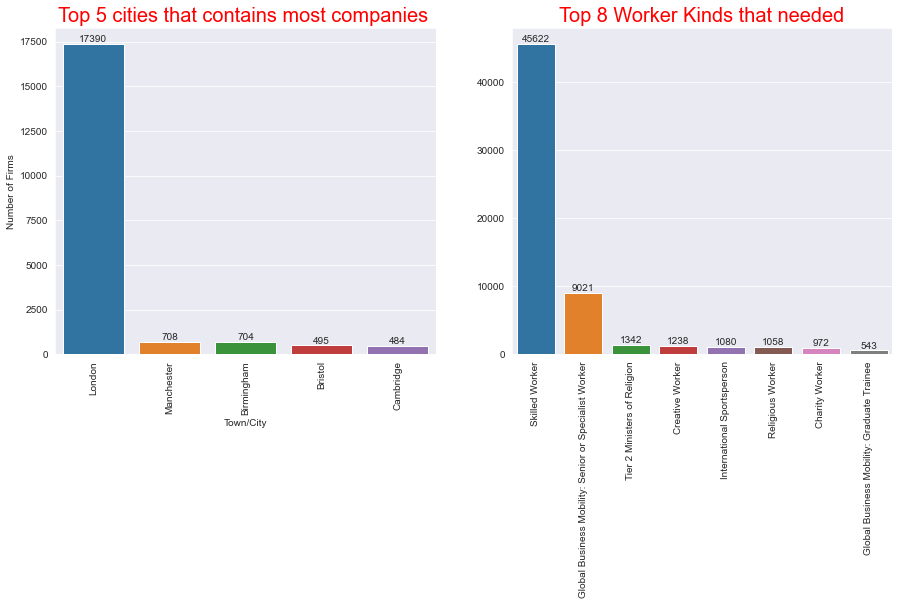

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x = df2["Town/City"], y = df2["Number of Firms"])
plt.xticks(rotation = 90);
for i in ax.containers:
    ax.bar_label(i)
plt.title("Top 5 cities that contains most companies ",fontdict={"fontsize":20,"color":"r"});
plt.subplot(1,2,2)
ax = sns.barplot(x = df.Route.value_counts()[0:8].index, y = df.Route.value_counts()[0:8].values)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation = 90);
plt.title("Top 8 Worker Kinds that needed" , fontdict = {"fontsize":20,"color":"r"});


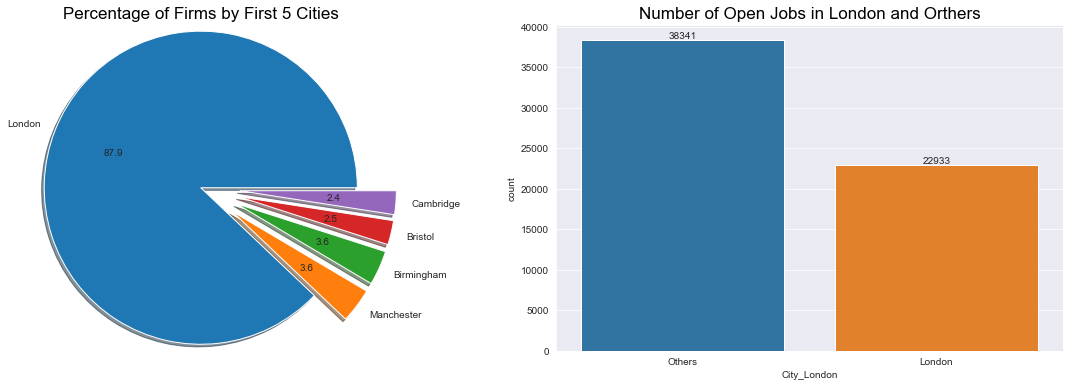

In [10]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.pie(labels=  df2["Town/City"] , x= df2["Number of Firms"] ,autopct="%1.1f" , explode = [0,0.3,0.3,0.3,0.3],shadow=True,radius = 1.2)
plt.title("Percentage of Firms by First 5 Cities",fontdict={"fontsize":17,"color":"black"});
plt.subplot(1,2,2)
ax = sns.countplot( x=df["City_London"]);
for i in ax.containers:
    ax.bar_label(i)
plt.title("Number of Open Jobs in London and Orthers",fontdict={"fontsize":17,"color":"black"});

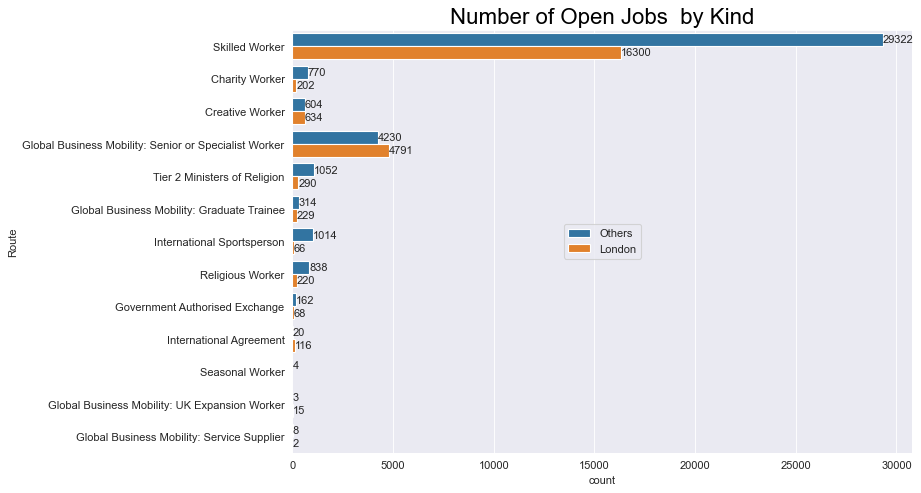

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,7),dpi = 80)
ax = sns.countplot(y = df.Route ,hue=df.City_London)
plt.xticks(rotation = 90);
for i in ax.containers:
    ax.bar_label(i)
plt.title("Number of Open Jobs  by Kind",fontdict={"fontsize":20,"color":"black"});
plt.legend(loc = "center",title = False);
plt.xticks(rotation = 0);



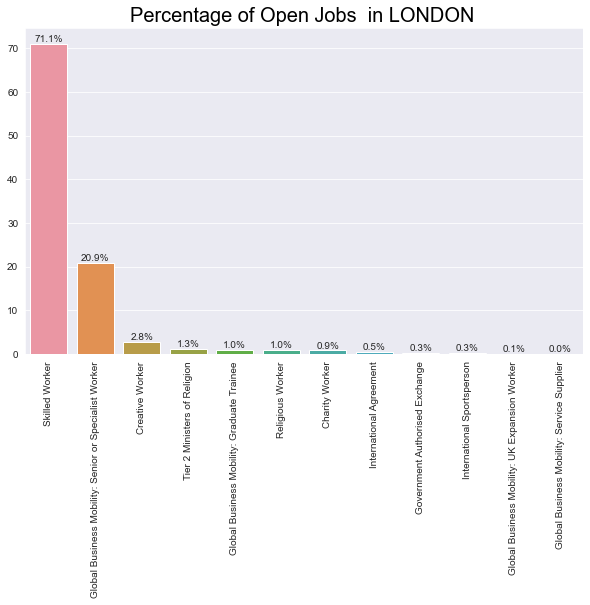

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize = (10,6))
ax = sns.barplot(x = df[df["Town/City"] == "London"].Route.value_counts().index , y = df[df["Town/City"] == "London"].Route.value_counts(normalize=True).values*100)
plt.xticks(rotation = 90);
for i in ax.containers:
    ax.bar_label(i,fmt = "%1.1f%%")
plt.title("Percentage of Open Jobs  in LONDON ",fontdict={"fontsize":20,"color":"black"});


In [13]:
x,y=0,10

## Google search for companies (10 by 10) in Scale-Up Visa List
### (Re-run to search other ten companies)

In [14]:

x,y = x+10,y+10
print(f"\n**** 10 Companies Between {x} and {y} of 49687 Companies ****\n")

for i in df["Organisation Name"].unique()[x:y]:
    webbrowser.open('https://www.google.com.tr/search?q='+i+'&hl=tr&sxsrf=ALiCzsYm1T4cs7xf1EyAml4i9zNEAXFWEQ%3A1662076348185&source=hp&ei=vEURY_yHCJCHxc8P78C36Ac&iflsig=AJiK0e8AAAAAYxFTzAeD9ONTiNSN3ubSCiBtLIhwUTSw&ved=0ahUKEwj81cfy5PT5AhWQQ_EDHW_gDX0Q4dUDCAc&uact=5&oq=fuat&gs_lcp=Cgdnd3Mtd2l6EAMyBAgjECcyCwgAEIAEELEDEIMBMggILhCABBCxAzILCAAQgAQQsQMQgwEyBwguELEDEEMyBwguELEDEEMyBwguELEDEEMyBwgAELEDEEMyCwgAEIAEELEDEIMBMgQILhBDOgcIIxDqAhAnOhEILhCABBCxAxCDARDHARDRAzoOCC4QgAQQsQMQgwEQ1AI6CAguELEDEIMBOgQIABBDOggIABCxAxCDAToKCAAQsQMQgwEQQzoOCC4QsQMQgwEQxwEQrwE6CAgAEIAEELEDUMkKWJAPYJsXaAFwAHgAgAGGAYgB-AOSAQMwLjSYAQCgAQGwAQo&sclient=gws-wiz', new=2)
    print(np.where(df["Organisation Name"].unique()[x:y] == i)[0]+1,i)



**** 10 Companies Between 10 and 20 of 49687 Companies ****

[1] 04608413
[2] 0xA Technologies Ltd
[3] 1 Digitals Europe Limited
[4] 1 Jupiter Star Ltd t/a Gurkha Oven
[5] 1 Key Solution Limited
[6] 1 Stop Print Ltd
[7] 10 Europe Limited
[8] 100 SHAPES LTD
[9] 1000heads Ltd
[10] 100Starlings Ltd


## Linkedin Company search for companies (10 by 10) in Scale-Up Visa List 
### (Re-run to search other ten companies)

In [15]:
print(f"\n**** 10 Companies Between {x} and {y} of 49687 Companies ****\n")
x,y = x+10,y+10
for i in df["Organisation Name"].unique()[x:y]:
    webbrowser.open('https://www.linkedin.com/search/results/companies/?companyHqGeo=%5B%22101165590%22%5D&keywords='+i+'&origin=GLOBAL_SEARCH_HEADER&sid=IeT', new=2)
    print(np.where(df["Organisation Name"].unique()[x:y] == i)[0]+1,i)



**** 10 Companies Between 10 and 20 of 49687 Companies ****

[1] 101 Ways Limited
[2] 10architect Ltd
[3] 10BE5 LTD.
[4] 10TO8 LIMITED
[5] 10X Future Technologies Services Ltd
[6] 11 BERKELEY STREET LIMITED
[7] 11 Hospitality Limited T/A Holiday Inn Birmingham Airport NEC
[8] 11:FS GROUP LIMITED
[9] 114 GPS Ltd  T/A Sushi Atelier
[10] 11K Consulting Ltd
